# Sentiment Analysis Models

## Logistic Regression

### Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
df = pd.read_csv("review_w_sentiment.csv")

In [18]:
df.head()

,Unnamed: 0,Review,Rating,sentiment
0,0,nice hotel expensive parking got good deal sta...,4,1
1,1,ok nothing special charge diamond member hilto...,2,-1
2,3,"unique, great stay, wonderful time hotel monac...",5,1
3,4,"great stay great stay, went seahawk game aweso...",5,1
4,5,love monaco staff husband stayed hotel crazy w...,5,1


### Split Data

In [19]:
dfNew = df[['Review','sentiment']]
dfNew.head()

,Review,sentiment
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,-1
2,"unique, great stay, wonderful time hotel monac...",1
3,"great stay great stay, went seahawk game aweso...",1
4,love monaco staff husband stayed hotel crazy w...,1


In [20]:
# random split train and test data
index = dfNew.index
dfNew['random_number'] = np.random.randn(len(index))
train = dfNew[dfNew['random_number'] <= 0.8]
test = dfNew[dfNew['random_number'] > 0.8]

We split thee data as we would for an Machine Learning project. We only keep the column for Review and setiment because the Review column is used as a feature for prediction of a sentiment, which is binary. We have either a negative or positive reaction to a hotel. 

### Bag of Words

In [21]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Review'])
test_matrix = vectorizer.transform(test['Review'])

The text in the dataframe is transformed by the which will contain a sparse matrix of integers. Words that are used frequently will be transformed to a number of occurance because the ML models cannot take anything but integers. 

### Implement Logistic regression and test

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [23]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [24]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

### Score and ROC Curve

In [25]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 559,   81],
       [  95, 3076]])

In [26]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.85      0.87      0.86       640
           1       0.97      0.97      0.97      3171

    accuracy                           0.95      3811
   macro avg       0.91      0.92      0.92      3811
weighted avg       0.95      0.95      0.95      3811



### F1 Score: 95%
This is an accurate model in predicting the sentiment analysis of positive or negative reactions of a hotel. 

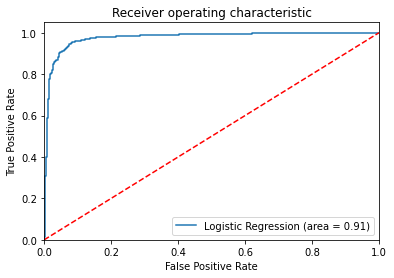

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curves want a line that is furthest curved from the red line. (Top-left Corner) This model works well since it does go towards the top left the most. 

## Random Forest Classficiation for Sentiment Analysis